<a href="https://colab.research.google.com/github/Sanj123ay/rf_jamming_detection/blob/main/RF_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('/content/augmented_dataset_100k.csv')

In [29]:
data.head()

,Time,SNR,Speed,RSSI,PDR,Relative_Speed,Scenario
0,0.1,22.35,25.45,-48.38,1.000000,25.313981,2
1,0.2,21.62,25.44,-49.14,0.999999,25.421060,2
2,0.3,20.85,25.46,-49.92,0.999997,25.327275,2
3,0.4,20.07,25.50,-50.69,0.999989,25.256933,2
4,0.5,19.30,25.46,-51.46,0.999958,25.038900,2


In [30]:
data.shape


(100000, 7)

In [31]:
data.isnull().sum()

,0
Time,0
SNR,0
Speed,0
RSSI,0
PDR,0
Relative_Speed,0
Scenario,0


In [32]:
data['Scenario'].value_counts()

,count
Scenario,
3,33551
2,33318
1,33131


In [33]:
X = data.drop('Scenario', axis=1)
Y = data['Scenario']

In [34]:
print(X.shape)
print(Y.shape)
print(X)
print(Y)

(100000, 6)
(100000,)
       Time        SNR      Speed       RSSI            PDR  Relative_Speed
0       0.1  22.350000  25.450000 -48.380000   9.999999e-01       25.313981
1       0.2  21.620000  25.440000 -49.140000   9.999995e-01       25.421060
2       0.3  20.850000  25.460000 -49.920000   9.999974e-01       25.327275
3       0.4  20.070000  25.500000 -50.690000   9.999888e-01       25.256933
4       0.5  19.300000  25.460000 -51.460000   9.999580e-01       25.038900
...     ...        ...        ...        ...            ...             ...
99995  57.7 -19.160148  22.702671 -60.989434  1.810000e-126        4.163834
99996  20.6 -26.069484  25.526408 -61.864228  1.810000e-126       25.560000
99997  42.4 -18.254432  22.752291 -61.681977   2.959646e-03        2.028679
99998  73.2  11.365628  22.693584 -58.580646   7.705451e-01       22.723699
99999  80.0  16.383654  22.764729 -58.639346   7.799162e-01       22.876275

[100000 rows x 6 columns]
0        2
1        2
2        2
3     

In [35]:
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
print(X)

[[-1.72843909  1.65672749  1.27458455  4.61934013  2.56333753  1.27182462]
 [-1.72498006  1.59861179  1.26699402  4.35817561  2.5633361   1.28279731]
 [-1.72152102  1.53731166  1.28217507  4.09013834  2.56332929  1.2731869 ]
 ...
 [-0.26526745 -1.57581408 -0.77311843  0.04828172 -0.74796114 -1.11428352]
 [ 0.80011521  0.78225546 -0.81768028  1.11401529  1.80128886  1.00639142]
 [ 1.03532957  1.18174335 -0.7636771   1.09384367  1.83241148  1.02202632]]


In [38]:
# Initial split into training and temp (validation + test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split temp into validation and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Testing size: {len(X_test)}")


Training size: 80000, Validation size: 10000, Testing size: 10000


In [39]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=30,
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=5,
                       min_samples_split=20, n_estimators=30, random_state=42)

In [40]:
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9606


In [41]:
#accuracy with train data
acc_class_train = rf_classifier.predict(X_train)
Accuracy = accuracy_score(acc_class_train,Y_train)
print(Accuracy)

0.96515


In [42]:
#accuracy with test data
acc_class_test = rf_classifier.predict(X_test)
Accuracy = accuracy_score(acc_class_test,Y_test)
print(Accuracy)

0.9612


Precision Recall F1 score for test data

In [43]:
y_true = Y_train # True labels
y_pred = rf_classifier.predict(X_train)  # Predicted labels

# Calculate metrics using macro averaging
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1)


Macro Precision: 0.9658314186971033
Macro Recall: 0.9652122223052463
Macro F1 Score: 0.9651952086451553


Precision Recall F1 score for val data

In [44]:
y_true = Y_val # True labels
y_pred = rf_classifier.predict(X_val)  # Predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate metrics using macro averaging
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Confusion Matrix:")
print(cm)
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1)


Confusion Matrix:
[[3303    1    5]
 [   4 3078  269]
 [  18   97 3225]]
Macro Precision: 0.9614063158158878
Macro Recall: 0.9607624690686044
Macro F1 Score: 0.960686280938828


Plotting learning curve

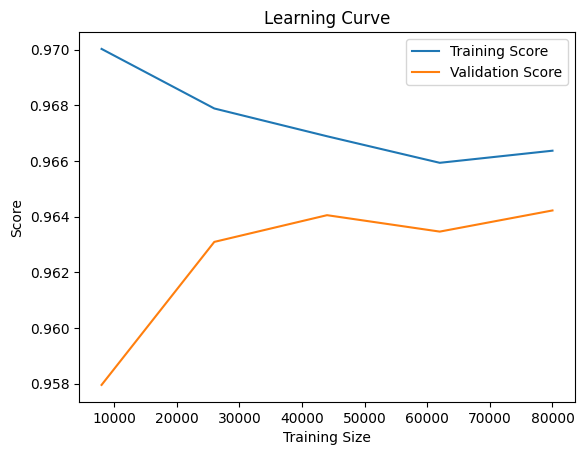

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, Y, cv=5, scoring='accuracy'
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()


Evaluate the model using cross-validation to assess its generalization performance.

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9642200000000001


 Error Analysis
Identify where the model fails:
Misclassified instances in classification problems.
High residuals in regression problems.

In [47]:
errors = pd.DataFrame({'Actual': Y_train, 'Predicted': rf_classifier.predict(X_train)})
errors = errors[errors['Actual'] != errors['Predicted']]
print(errors)


       Actual  Predicted
54744       2          3
21915       2          3
57900       3          2
28349       2          3
44513       2          3
...       ...        ...
80356       3          1
11534       2          3
53707       3          2
37194       2          3
54886       2          3

[2788 rows x 2 columns]


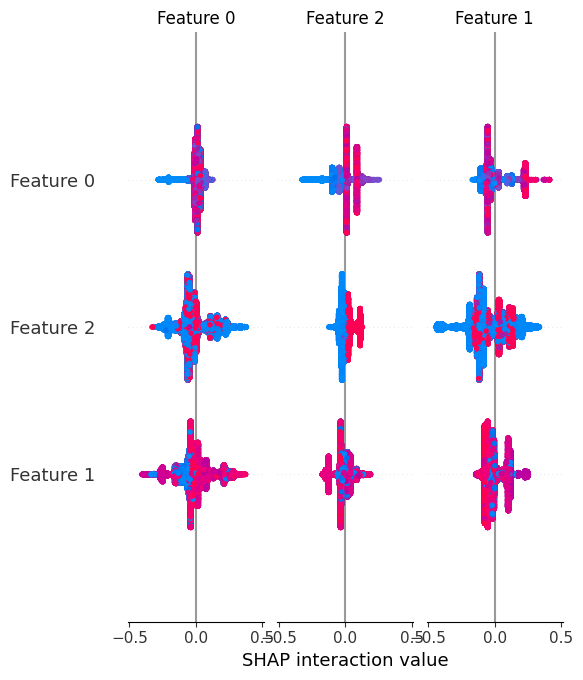

In [48]:
import shap

explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


Saving the trained model

In [49]:
import pickle

In [56]:
# Save the trained model
model_filename = 'RF_model.sav'
pickle.dump(rf_classifier, open(model_filename, 'wb'))
print(f"Model saved as '{model_filename}'")

Model saved as 'RF_model.sav'


In [57]:
# Loading the saved model

loaded_model = pickle.load(open('RF_model.sav', 'rb'))
print("Model loaded successfully.")


Model loaded successfully.


In [58]:
# Save the fitted scaler
scaler_filename = 'scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))
print(f"Scaler saved as '{scaler_filename}'")

Scaler saved as 'scaler.sav'


In [59]:
# Load the scaler
loaded_scaler = pickle.load(open('scaler.sav', 'rb'))
print("Scaler loaded successfully.")

Scaler loaded successfully.


Model prediction system

In [54]:
'''import numpy as np
input_data = (48,9.54,22.74,-60.51,0.4527263181,1.249401507)

# making input_data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('(No Attack)')
elif (prediction[0] == 2):
  print('Reactive Jammer Attack')
elif (prediction[0] == 3):
  print('Constant Jammer Attack')'''

"import numpy as np\ninput_data = (48,9.54,22.74,-60.51,0.4527263181,1.249401507)\n\n# making input_data as numpy array\ninput_data_as_numpy_array = np.asarray(input_data)\n\n# reshape the array as we are predicting for one instance\ninput_data_reshaped = input_data_as_numpy_array.reshape(1,-1)\n\n# standardize the input data\nstd_data = scaler.transform(input_data_reshaped)\n\nprediction = loaded_model.predict(std_data)\nprint(prediction)\n\nif (prediction[0] == 1):\n  print('(No Attack)')\nelif (prediction[0] == 2):\n  print('Reactive Jammer Attack')\nelif (prediction[0] == 3):\n  print('Constant Jammer Attack')"

In [60]:


import numpy as np

# Example input data (6 features: time, SNR, SPEED, RSSI, PDR, RELATIVE SPEED)
input_data = (48, 9.54, 22.74, -60.51, 0.4527263181, 1.249401507)

# Reshape input_data to be a 2D array for scaling
input_data_reshaped = np.asarray(input_data).reshape(1, -1)

# Load the saved scaler
scaler = pickle.load(open('scaler.sav', 'rb'))

# Scale the input data using the loaded scaler
std_data = scaler.transform(input_data_reshaped)

# Load the saved model
loaded_model = pickle.load(open('RF_model.sav', 'rb'))

# Predict the class using the loaded model
prediction = loaded_model.predict(std_data)

# Map predictions to human-readable labels
labels = {
    1: '(No Attack)',
    2: 'Reactive Jammer Attack',
    3: 'Constant Jammer Attack'
}

# Print the prediction and corresponding label
print(f"Prediction: {prediction[0]} - {labels[prediction[0]]}")


Prediction: 2 - Reactive Jammer Attack
